In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [6]:
# Import the data
df = pd.read_csv('car.csv')

In [7]:
# Exploratory data analysis
# Now, I will explore the data to gain insights about the data.

In [9]:
# view  dimentions of the data set
df.shape

(1727, 7)

In [10]:
# we can see that there are 1727 instences and 7 variables in the ata set.

In [11]:
#View top 5 rows of the dataset
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1q-o5HxHIlesoYM6iWmUC-6uj-V092zpNZ2pP7iOwytA#gid=0


## **Rename column names**

We can see that the dataset does not have proper column names. The columns are merely labelled. We should give proper names to the columns. I will do it as follows:-


In [13]:
cal_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = cal_names
cal_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [14]:
# lets prieview  the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


we can see the column names has been renamed. Now, the columns have meaningful names.

## **View summary of dataset**


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# **Frequenty distribtion of values in the variables.**

Now i'll check the frequency count of categorical variables.

In [16]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for cal in col_names:
  print(df[cal].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


# **Summary of variables**

There are 7 variables in the dataset. All the variables are of categorical data type.

These are given by buying, maint, doors, persons, lug_boot, safety and class.

class is the target variable.

# **Explore class variable**

In [17]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


The class target variable is ordinal in nature.

# **Missing values in variables**

In [18]:
#chaek the missing values in variables.
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# **Declare feature vector and target variable**

In [19]:
X = df.drop(['class'], axis=1)
y = df['class']

# **Split data into separate traning and test set**

In [20]:
#split data in to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# check the shape of X_train, X_test
X_train.shape, X_test.shape

((1157, 6), (570, 6))

# **Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [21]:
# check the data type in X_train
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


# **Encode catagorical variables.**
Now, I will encode the catagorical variables

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [23]:
!pip install category_encoders
#import category encoder
import category_encoders as ce

In [24]:
#encode  categorical variables with ordianl encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [26]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [27]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


# **Randon forest classifier model with default parameters**

In [28]:
# import Randomforest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train, y_train)

#predict the test set results
y_pred = rfc.predict(X_test)

#check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9667


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# **Random Forest Classifier model with parameter n_estimators=100**

In [32]:
#instanciate the classifier with n_esimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

#fit the model to train the set
rfc_100.fit(X_train, y_train)

#predict the test set results
y_pred_100 = rfc_100.predict(X_test)

#check the accuracy score
print('Mode accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

Mode accuracy score with 100 decision-trees : 0.9649


The model accuracy score with 10 decision-trees is 0.9667 but the same with 100 decision-trees is 0.9649. So, accuracy nearly same with more number of decision-trees in the model.

# **Find important features with Random Forest model**

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

In [33]:
#First, I will create the Random Forest model as follows:-
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

#fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
#Now, I will use the feature importance variable to see feature importance scores.

In [35]:
# view the feture scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.291657
persons,0.235380
buying,0.160692
maint,0.134143
lug_boot,0.111595
doors,0.066533


We can see that the most **important feature is safety** and **least important feature is doors**

# **Visualize the feature scores of the features**

Now, I will visualize the feature scores with matplotlib and seaborn.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

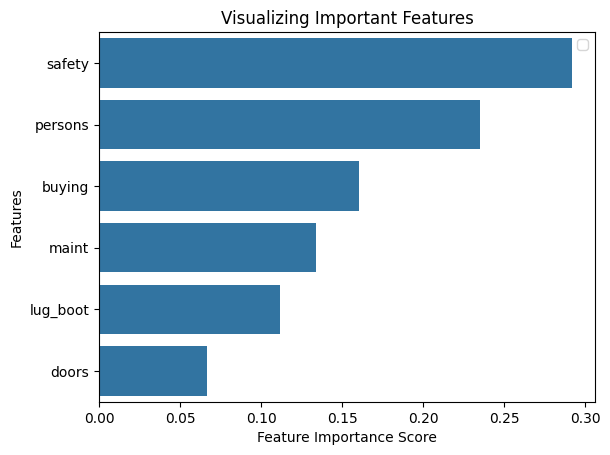

In [36]:
# creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt

# **Build the Random Forest model on selected features**

Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [37]:
#declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [38]:
# split the data in to training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, I will build the random forest model and check accuracy.

In [40]:
# encode the categoriacl variables with n_estimaror = 100
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [41]:
#instanciate the classifier with n_estimaters = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

#fit the model to the training set
clf.fit(X_train, y_train)

#predict the test set results
y_pred = clf.predict(X_test)

#check the accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9263


I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9263. The accuracy of the model with all the variables taken into account is 0.0.9649. So, we can see that the model accuracy has been decreased with doors variable removed from the model.

Furthermore, the second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# **Confusion matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.


**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [43]:
# print the confusion matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


# **Classification Report**

**Classification report** is another way to evaluate the classification model performance. It displays the **precision, recall, f1 and support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



# **Results and conclusion**

1)In this project, I build a Random Forest Classifier to predict the safety of
the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.


2)The model accuracy score with 10 decision-trees is 0.9667 but the same with 100 decision-trees is 0.9649. So, accuracy nearly same with more number of decision-trees in the model.


3)I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.


4)I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9263. The accuracy of the model with all the variables taken into account is 0.0.9649. So, we can see that the model accuracy has been decreased with doors variable removed from the model.

5)The second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

6)Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.